### Сидоров Никита, БПМ161
# ЛАБОРАТОРНАЯ РАБОТА 4.
## РЕШЕНИЕ СИСТЕМ ЛИНЕЙНЫХ АЛГЕБРАИЧЕСКИХ УРАВНЕНИЙ ИТЕРАЦИОННЫМИ МЕТОДАМИ.

### Задание 1 (4.1.23)

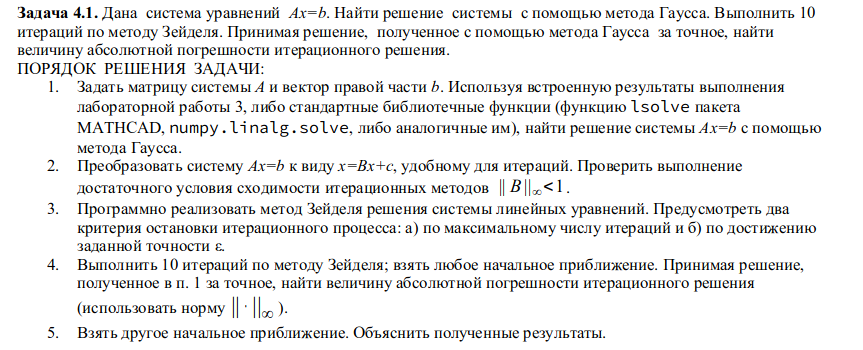

In [72]:
from IPython.display import Image
Image("/home/nikita/Изображения/task1.png")

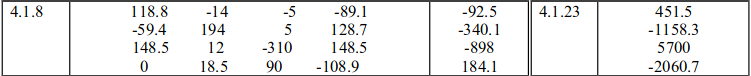

In [73]:
Image("/home/nikita/Изображения/task1_1.png")

In [58]:
import numpy as np
from scipy import linalg as sp
import matplotlib.pyplot as plt
%matplotlib inline

Зададим матрицу системы A и вектор правой части b.

In [59]:
A=np.array([[118.8,-14,-5,-89.1],[-59.4,194,5,128.7],[148.5,12,-310,148.5],[ 0,18.5,90,-108.9]])
b=np.array([451.5,-1158.3,5700,-2060.7])
print('A:')
print(A)
print('b:')
print(b)

A:
[[ 118.8  -14.    -5.   -89.1]
 [ -59.4  194.     5.   128.7]
 [ 148.5   12.  -310.   148.5]
 [   0.    18.5   90.  -108.9]]
b:
[  451.5 -1158.3  5700.  -2060.7]


Решим систему Ax=b, используя библиотечную функцию.

In [60]:
x_true = np.linalg.solve(A,b)
print(x_true)

[ 9.23232323 -9.         -9.9         9.21212121]


In [61]:
def change(A,b):
    """Преобразует матрицу A и вектор b в матрицу B и вектор c, удобные для итераций.
    Ax=b <=> x=Bx+c
    
    Возвращает матрицу B и вектор с."""
    D=np.diag(A)
    L=np.tril(A,-1)
    U=np.triu(A,1)
    n=A.shape[0]
    inv=sp.solve_triangular(D*np.eye(n)+L,np.eye(n),lower=True)
    B=-inv@U
    c=inv@b
    
    return B,c

def Seidel(B,c,x0,maxiter=10,eps=1e-5):
    """Решает систему уравнений х=Вх+с методом Зейделя, принимая вектор х0 за начальное приближение.
    
    Предусмотрено два критерия остановки итерационного процесса: 
    а) по максимальному числу итераций maxiter
    б) по достижению заданной точности eps
    
    Возвращает найденное решение, а также число проведённых итераций."""
    x_new=x0
    for i in range(maxiter):
        x_old=x_new
        x_new=B@x_old+c
        if np.linalg.norm(x_new-x_old,ord=np.inf)<eps:
            return x_new,i+1
        
    return x_new,i+1

Проверим выполнение достаточного условия сходимости итерационных методов:
$||B||_\inf<1$

In [63]:
B,c=change(A,b)
print('||B|| =',np.linalg.norm(B,ord=np.inf))

||B|| = 0.9099326599326598


Как видим, $||B||_\inf$ меньше единицы, хотя и близка к ней.

Выполним 10 итераций по методу Зейделя.

In [67]:
x0=np.array([1,1,1,1])
x_Seidel=np.round(Seidel(B,c,x0)[0],5)
print('x =',x_Seidel)

x = [ 9.1937  -8.97381 -9.94354  9.18058]


Вычислим абсолютную погрешность.

In [68]:
print(np.linalg.norm(x_true-x_Seidel,ord=np.inf))

0.04353999999999125


Как видим, абсолютная погрешность превосходит $\epsilon = 10^{-5}$.

Возьмём другое начальное приближение.

In [70]:
x0=np.array([1,2,3,4])
x_Seidel=np.round(Seidel(B,c,x0)[0],5)
print('x =',x_Seidel)
print('Погрешность равна',np.linalg.norm(x_true-x_Seidel,ord=np.inf))

x = [ 9.21119 -8.98567 -9.92382  9.19487]
Погрешность равна 0.02381999999998996


Получили снова большую ошибку. Выведем количество проведённых итераций.

In [71]:
x_Seidel,number=Seidel(B,c,x0)
print('Число итераций:',number)

Число итераций: 10


Таким образом, можно сделать вывод, что из-за большой нормы матрицы В десяти итераций недостаточно для получения желаемой точности. Но, тем не менее, метод довольно близко подобрался к решению.

### Задание 2 (4.2)

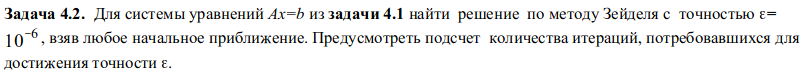

In [74]:
Image("/home/nikita/Изображения/task2.png")

In [75]:
x0=np.array([1,2,3,4])
x_Seidel,number=Seidel(B,c,x0,100,1e-6)
print('x =',np.round(x_Seidel,6))
print('Число итераций:',number)

x = [ 9.232322 -8.999999 -9.900001  9.21212 ]
Число итераций: 28


### Задание 3 (4.5.6)

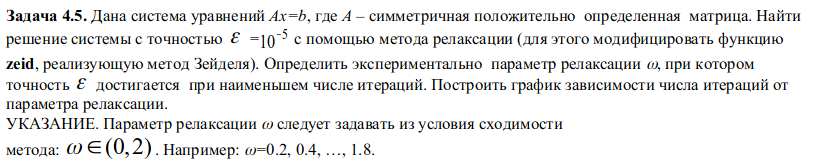

In [76]:
Image("/home/nikita/Изображения/task3.png")

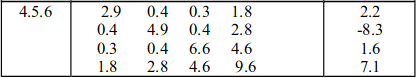

In [77]:
Image("/home/nikita/Изображения/task3_1.png")

In [78]:
A=np.array([[2.9,0.4,0.3,1.8],[0.4,4.9,0.4,2.8],[0.3,0.4,6.6,4.6],[1.8,2.8,4.6,9.6]])
b=np.array([2.2,-8.3,1.6,7.1])
print('A:')
print(A)
print('b:')
print(b)

A:
[[2.9 0.4 0.3 1.8]
 [0.4 4.9 0.4 2.8]
 [0.3 0.4 6.6 4.6]
 [1.8 2.8 4.6 9.6]]
b:
[ 2.2 -8.3  1.6  7.1]


In [79]:
def SOR(B,c,x0,omega,maxiter=10,eps=1e-5):
    """Находит решение системы х=Вх+с методом релаксации.
    
    Возвращает найденное решение, а также число проведённых итераций."""
    x_new=x0
    for i in range(maxiter):
        x_old=x_new
        x_new=B@x_old+c
        x_new=x_new*omega+x_old*(1-omega)
        if np.linalg.norm(x_new-x_old,ord=np.inf)<eps:
            return x_new,i+1
        
    return x_new,i+1

In [80]:
B,c=change(A,b)
x0=np.array([1,1,1,1])
x_SOR,number=SOR(B,c,x0,0.5,100)
print('x =',np.round(x_SOR,5))
print('Число итераций:',number)

x = [-0.01703 -2.7723  -1.00599  2.0334 ]
Число итераций: 38


In [81]:
omegas=np.linspace(0.2,2,10)
numbers=[]
for omega in omegas:
    x_SOR,number=SOR(B,c,x0,omega,500)
    numbers.append(number)

Text(0, 0.5, 'number of iterations')

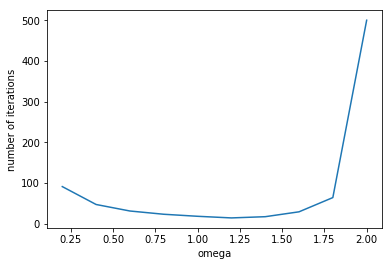

In [82]:
plt.plot(omegas,numbers)
plt.xlabel('omega')
plt.ylabel('number of iterations')

In [84]:
print('Оптимальное значение omega:',omegas[np.argmin(numbers)])

Оптимальное значение omega: 1.2


### Задание 4 (4.9.6)

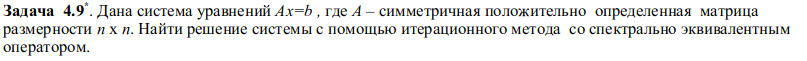

In [85]:
Image("/home/nikita/Изображения/task4.png")

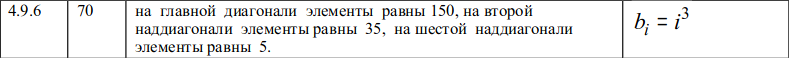

In [86]:
Image("/home/nikita/Изображения/task4_1.png")

In [87]:
import cmath

In [88]:
n=70
A=np.diag([150]*70)+np.diag([35]*68,2)+np.diag([35]*68,-2)+np.diag([5]*64,6)+np.diag([5]*64,-6)
A[:10,:10]

array([[150,   0,  35,   0,   0,   0,   5,   0,   0,   0],
       [  0, 150,   0,  35,   0,   0,   0,   5,   0,   0],
       [ 35,   0, 150,   0,  35,   0,   0,   0,   5,   0],
       [  0,  35,   0, 150,   0,  35,   0,   0,   0,   5],
       [  0,   0,  35,   0, 150,   0,  35,   0,   0,   0],
       [  0,   0,   0,  35,   0, 150,   0,  35,   0,   0],
       [  5,   0,   0,   0,  35,   0, 150,   0,  35,   0],
       [  0,   5,   0,   0,   0,  35,   0, 150,   0,  35],
       [  0,   0,   5,   0,   0,   0,  35,   0, 150,   0],
       [  0,   0,   0,   5,   0,   0,   0,  35,   0, 150]])

In [89]:
b=np.array([(1j)**3]*70)
b

array([-0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j,
       -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j,
       -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j,
       -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j,
       -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j,
       -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j,
       -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j,
       -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j,
       -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j,
       -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j, -0.-1.j])

In [90]:
def canonic(A,b,x0,maxiter=10,eps=1e-5):
    """Решает систему Ax=b итерационным методом.
    P=D+L, где D-диагональная, L-верхнетреугольная
    tau=1
    
    Возвращает найденное решение."""
    D=np.diag(A)
    L=np.tril(A,-1)
    P=D*np.eye(n)+L
    tau=1
    x_new=x0
    for i in range(maxiter):
        x_old=x_new
        r=b-A@x_old
        z=sp.solve_triangular(P,r,lower=True)
        x_new=x_old+tau*z
        if np.linalg.norm(x_new-x_old,ord=np.inf)<eps:
            return x_new
        
    return x_new

In [92]:
x0=np.array([-0.1j]*n)
x=np.round(canonic(A,b,x0,maxiter=100,eps=1e-5),5)
print('x =',x)

x = [0.-0.00555j 0.-0.00555j 0.-0.00416j 0.-0.00416j 0.-0.00456j 0.-0.00456j
 0.-0.00425j 0.-0.00425j 0.-0.00438j 0.-0.00438j 0.-0.00433j 0.-0.00433j
 0.-0.00436j 0.-0.00436j 0.-0.00434j 0.-0.00434j 0.-0.00435j 0.-0.00435j
 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j
 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j
 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j
 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j
 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j
 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j 0.-0.00435j
 0.-0.00434j 0.-0.00434j 0.-0.00436j 0.-0.00436j 0.-0.00433j 0.-0.00433j
 0.-0.00438j 0.-0.00438j 0.-0.00425j 0.-0.00425j 0.-0.00456j 0.-0.00456j
 0.-0.00416j 0.-0.00416j 0.-0.00555j 0.-0.00555j]


Сравним решение с тем, которое выдаёт np.linalg.solve

In [94]:
x_true=np.linalg.solve(A,b)
print(np.linalg.norm(x-x_true,ord=np.inf))

4.5145741223301394e-06


Как видим, ошибка меньше $\epsilon = 10^{-5}$. Значит, метод работает верно.